In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

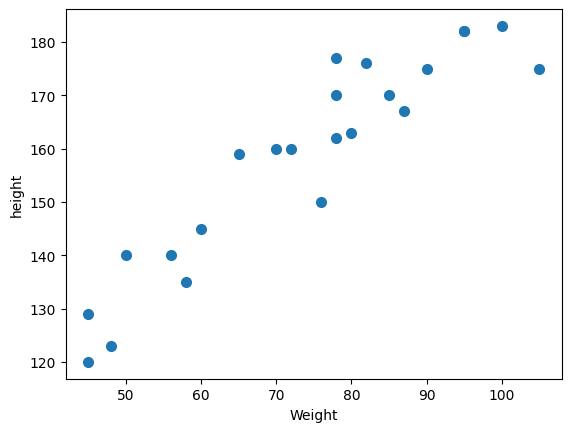

In [4]:
# scatter plot

plt.scatter(df['Weight'], df['Height'], linewidths=2)
plt.xlabel('Weight')
plt.ylabel('height')

In [5]:
# finding correlation

df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


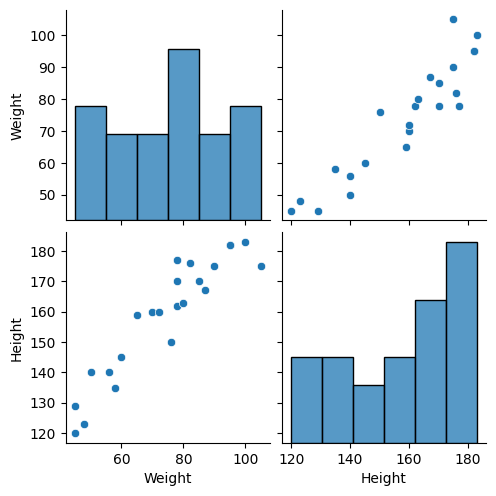

In [6]:
# seaborn for visualization

import seaborn as sns
sns.pairplot(df)

In [7]:
# independent and dependent features

df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [8]:
x = df[['Weight']]  ##shpuld be in a dataframe or 2D array
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [9]:
y=df['Height']  ##this can be a 1D array (dependent feature)
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [10]:
# training and testing split

from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [12]:
x_train.shape

(17, 1)

In [13]:
y_train.shape

(17,)

In [14]:
# apply standardization make mean=0 and sd=1

from sklearn.preprocessing import StandardScaler

In [15]:
# apply this only for independent variable(x)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [16]:
x_test = scaler.transform(x_test)

In [17]:
# apply simple linear regression algo

from sklearn.linear_model import LinearRegression

In [18]:
regression = LinearRegression(n_jobs=-1)

In [19]:
regression.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [20]:
# coefficient B0 (slope)

regression.coef_

array([17.2982057])

In [21]:
# intercept B1

regression.intercept_

np.float64(156.47058823529412)

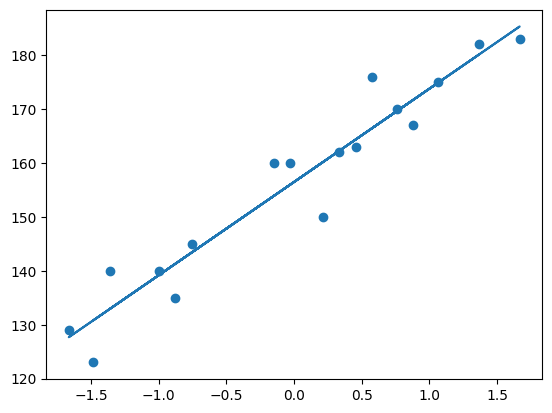

In [22]:
# plot the training data best fit line

plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train))

##what is happening

y_pred = intercept + coeff(weight(x))

In [23]:
# prediction for test data

y_pred = regression.predict(x_test)

In [24]:
# performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [26]:
from sklearn.metrics import r2_score

In [27]:
# R-square score of the model

score = r2_score(y_test, y_pred)
print(score)

0.7360826717981276


In [28]:
# adjusted R-square value of the model

1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

In [29]:
# OLS linear regression

import statsmodels.api as sm

In [30]:
model = sm.OLS(y_train, x_train).fit()

In [31]:
prediction = model.predict(x_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [32]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 05 Jun 2025   Prob (F-statistic):                       0.664
Time:                        10:09:33   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

d:\DS, ML, DL, NLP\Machine Learning\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [33]:
# prediction for new data

regression.predict([[72]])

array([1401.94139895])

In [34]:
regression.predict(scaler.transform([[72]]))

d:\DS, ML, DL, NLP\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [35]:
regression.predict(scaler.transform([[74.200]]))

d:\DS, ML, DL, NLP\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.2828821])